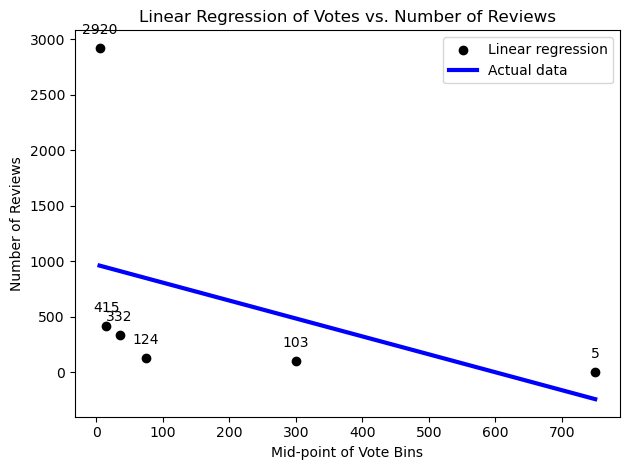

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load your JSON file
data = pd.read_json('C:/USD/ms-aai-501-final-project/data/Software_5-core.json', lines=True)

# Convert the 'vote' column to numeric, handling non-numeric values
data['vote'] = pd.to_numeric(data['vote'], errors='coerce')
data.dropna(subset=['vote'], inplace=True)

# Cast votes to integer
data['vote'] = data['vote'].astype(int)

# Define the bins and labels for vote counts
bins = [-1, 0, 10, 20, 50, 100, 500, 1000, np.inf]  # Adjust the bins as needed
bin_labels = [0, 5, 15, 35, 75, 300, 750, 1500]  # Midpoints of the bins

# Bin the vote counts using pd.cut and assign bin labels as midpoints
data['vote_bin'] = pd.cut(data['vote'], bins=bins, labels=bin_labels)

# Convert binned vote labels to integers
data['vote_bin'] = data['vote_bin'].astype(int)

# Group by the binned vote counts and get the number of reviews for each bin
vote_counts = data.groupby('vote_bin').size().reset_index(name='review_count')

# Prepare data for linear regression
X = vote_counts['vote_bin'].values.reshape(-1, 1)  # Feature matrix (independent variable)
y = vote_counts['review_count'].values  # Target vector (dependent variable)

# Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot outputs
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.xlabel('Mid-point of Vote Bins')
plt.ylabel('Number of Reviews')
plt.title('Linear Regression of Votes vs. Number of Reviews')
plt.legend(['Linear regression', 'Actual data'])

# Annotate each point with the actual review count
for i, txt in enumerate(y):
    plt.annotate(txt, (X[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()